<a href="https://colab.research.google.com/github/CodeX-Addy/VGG16_Custom/blob/main/VGG16_CUSTOM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from __future__ import print_function

import numpy as np
import warnings

from keras.models import Model
from keras.layers import Flatten,Dense, Input, Conv2D, MaxPooling2D, GlobalAveragePooling2D , GlobalMaxPooling2D

from keras.preprocessing import image

from keras.utils import layer_utils

from keras.utils.data_utils import get_file

from keras import backend as K
from keras.applications.imagenet_utils import decode_predictions, preprocess_input

# from keras.applications.imagenet_utils import _obtain_input_shape # this will work for older versions of keras. 2.2.0 or before

# from keras.engine.topology import get_source_inputs
from keras.utils.layer_utils import get_source_inputs

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


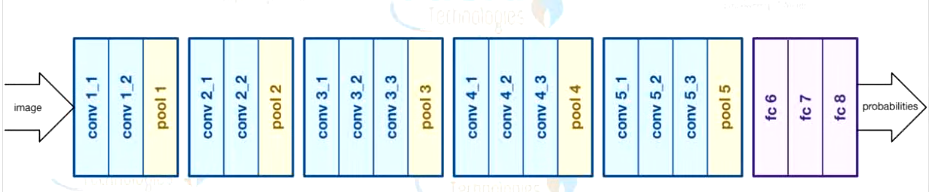

In [ ]:
def VGG_custom(input_tensor=None,classes=2):     # Yes Tumor or No Tumor
   
    img_rows, img_cols = 224, 224   # by default size is 224,224
    img_channels = 3    # RGB

    img_dim = (img_rows, img_cols, img_channels)
   
    img_input = Input(shape=img_dim)
    
    # Block 1
    x = Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv1')(img_input)
    x = Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv2')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block1_pool')(x)

    # Block 2
    x = Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv1')(x)
    x = Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv2')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block2_pool')(x)

    # Block 3
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv1')(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv2')(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv3')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block3_pool')(x)

    # Block 4
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv1')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv2')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv3')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block4_pool')(x)

    # Block 5
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv1')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv2')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv3')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block5_pool')(x)

    
    # Classification block
    x = Flatten(name='flatten')(x)
    x = Dense(4096, activation='relu', name='fc1')(x)
    x = Dense(4096, activation='relu', name='fc2')(x)
    x = Dense(classes, activation='softmax', name='predictions')(x)

    # Create model.
   
     
    model = Model(inputs = img_input, outputs = x, name='VGG_custom_aditya_testing')


    return model

In [ ]:
model = VGG_custom(classes = 2) # No Tumor and Yes Tumor

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


**Importing the dataset so to give input to model**

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import os

img_dir = '/content/drive/MyDrive/ColabNotebooks/BTdsYesNo/'

dataset_path = os.listdir(img_dir)

dataset_category = os.listdir(img_dir)
print (dataset_category)  #what kinds of data are in this dataset

print("Types of data found: ", len(dataset_path))



['no', 'yes']
Types of data found:  2


**Building the dataframe**

In [ ]:
# !jupyter notebook --NotebookApp.iopub_data_rate_limit=1.0e10

In [ ]:
dataset = []

for item in dataset_category:
    # Get all the file names
    all_data = os.listdir(img_dir + '/' +item)

    print(all_data)

 # Add them to the list
    for images in all_data:
        dataset.append((item, str(img_dir+ '/' +item) + '/' + images))
        # print(dataset)

['no1410.jpg', 'no175.jpg', 'no150.jpg', 'no183.jpg', 'no234.jpg', 'no1164.jpg', 'no1135.jpg', 'no1286.jpg', 'no1194.jpg', 'no1482.jpg', 'no1281.jpg', 'no163.jpg', 'no1070.jpg', 'no254.jpg', 'no200.jpg', 'no1146.jpg', 'no1476.jpg', 'no258.jpg', 'no279.jpg', 'no1169.jpg', 'no1371.jpg', 'no290.jpg', 'no1076.jpg', 'no1098.jpg', 'no1435.jpg', 'no185.jpg', 'no1148.jpg', 'no1347.jpg', 'no1094.jpg', 'no1448.jpg', 'no1343.jpg', 'no1302.jpg', 'no1060.jpg', 'no239.jpg', 'no1145.jpg', 'no1425.jpg', 'no1244.jpg', 'no261.jpg', 'no176.jpg', 'no262.jpg', 'no1295.jpg', 'no214.jpg', 'no1312.jpg', 'no1325.jpg', 'no235.jpg', 'no1428.jpg', 'no1427.jpg', 'no1134.jpg', 'no124.jpg', 'no270.jpg', 'no1252.jpg', 'no1354.jpg', 'no1061.jpg', 'no1493.jpg', 'no252.jpg', 'no1219.jpg', 'no1215.jpg', 'no1268.jpg', 'no1332.jpg', 'no1497.jpg', 'no296.jpg', 'no260.jpg', 'no1082.jpg', 'no1112.jpg', 'no133.jpg', 'no1123.jpg', 'no1170.jpg', 'no1230.jpg', 'no1132.jpg', 'no146.jpg', 'no1227.jpg', 'no1452.jpg', 'no179.jpg', 'n

In [ ]:
# Build a dataframe        

tumor_df = pd.DataFrame(data=dataset, columns=['Tumor', 'image'])
print(tumor_df.head())
print(tumor_df.tail())

  Tumor                                              image
0    no  /content/drive/MyDrive/ColabNotebooks/BTdsYesN...
1    no  /content/drive/MyDrive/ColabNotebooks/BTdsYesN...
2    no  /content/drive/MyDrive/ColabNotebooks/BTdsYesN...
3    no  /content/drive/MyDrive/ColabNotebooks/BTdsYesN...
4    no  /content/drive/MyDrive/ColabNotebooks/BTdsYesN...
     Tumor                                              image
2995   yes  /content/drive/MyDrive/ColabNotebooks/BTdsYesN...
2996   yes  /content/drive/MyDrive/ColabNotebooks/BTdsYesN...
2997   yes  /content/drive/MyDrive/ColabNotebooks/BTdsYesN...
2998   yes  /content/drive/MyDrive/ColabNotebooks/BTdsYesN...
2999   yes  /content/drive/MyDrive/ColabNotebooks/BTdsYesN...


In [ ]:
# Let's check how many samples for each category are present
print("Total number of images are there in the dataset: ", len(tumor_df))

images_count = tumor_df['Tumor'].value_counts()

print("Images in each category: ")
print(images_count)

Total number of images are there in the dataset:  3000
Images in each category: 
no     1500
yes    1500
Name: Tumor, dtype: int64


**Data Processing**

In [ ]:
import cv2
from PIL import Image



In [ ]:
no_tumor = os.listdir(img_dir + 'no')

#check if it did it perfectly
print(no_tumor)

['no1410.jpg', 'no175.jpg', 'no150.jpg', 'no183.jpg', 'no234.jpg', 'no1164.jpg', 'no1135.jpg', 'no1286.jpg', 'no1194.jpg', 'no1482.jpg', 'no1281.jpg', 'no163.jpg', 'no1070.jpg', 'no254.jpg', 'no200.jpg', 'no1146.jpg', 'no1476.jpg', 'no258.jpg', 'no279.jpg', 'no1169.jpg', 'no1371.jpg', 'no290.jpg', 'no1076.jpg', 'no1098.jpg', 'no1435.jpg', 'no185.jpg', 'no1148.jpg', 'no1347.jpg', 'no1094.jpg', 'no1448.jpg', 'no1343.jpg', 'no1302.jpg', 'no1060.jpg', 'no239.jpg', 'no1145.jpg', 'no1425.jpg', 'no1244.jpg', 'no261.jpg', 'no176.jpg', 'no262.jpg', 'no1295.jpg', 'no214.jpg', 'no1312.jpg', 'no1325.jpg', 'no235.jpg', 'no1428.jpg', 'no1427.jpg', 'no1134.jpg', 'no124.jpg', 'no270.jpg', 'no1252.jpg', 'no1354.jpg', 'no1061.jpg', 'no1493.jpg', 'no252.jpg', 'no1219.jpg', 'no1215.jpg', 'no1268.jpg', 'no1332.jpg', 'no1497.jpg', 'no296.jpg', 'no260.jpg', 'no1082.jpg', 'no1112.jpg', 'no133.jpg', 'no1123.jpg', 'no1170.jpg', 'no1230.jpg', 'no1132.jpg', 'no146.jpg', 'no1227.jpg', 'no1452.jpg', 'no179.jpg', 'n

In [ ]:
im_size = 224

dataset = []
label = []

# for i in tumor_df:
#     data_path = img_dir + str(i)  
#     filenames = [i for i in os.listdir(data_path) ]
   
#     for f in filenames:
#         img = cv2.imread(data_path + '/' + f)
#         img = cv2.resize(img, (im_size, im_size))
#         dataset.append(img)
#         label.append(i)


In [ ]:
# check it its a jpg bcz we only needed jpg img only
# os.listdir(img_dir + 'no')
# enumerate(no_tumor)
for i , img_all in enumerate(no_tumor):
    if( img_all.split('.')[1] == 'jpg' ):
        try:
            image = cv2.imread( img_dir + 'no/' + img_all)  # selection of only .jpg format
            image = Image.fromarray( image, 'RGB')
            image = image.resize( (im_size,im_size) ) # resizing image 
            dataset.append( np.array(image))
            label.append(0)
        except:
            print(i)

In [ ]:
# doing the same for tumor = yes images
yes_tumor = os.listdir(img_dir + 'yes')
for i , img_all in enumerate(yes_tumor):
    if( img_all.split('.')[1] == 'jpg' ):
        image = cv2.imread( img_dir + 'yes/' + img_all)  # selection of only .jpg format
        image = Image.fromarray( image, 'RGB')
        image = image.resize( (im_size,im_size) ) # resizing image 
        dataset.append( np.array(image))
        label.append(1)

In [ ]:
print(len(label))
len(dataset)

3000


3000

In [ ]:
dataset = np.array(dataset)

dataset = dataset.astype('float32') / 255.0
dataset.shape 

(3000, 224, 224, 3)

In [ ]:
from sklearn.preprocessing import LabelEncoder , OneHotEncoder
from sklearn.compose import ColumnTransformer


y=tumor_df['Tumor'].values
#print(y[:5])

y_labelencoder = LabelEncoder ()
y = y_labelencoder.fit_transform (y)
y

array([0, 0, 0, ..., 1, 1, 1])

In [ ]:
y = y.reshape(-1,1)
columnTransformer = ColumnTransformer([('encoder', OneHotEncoder(), [0])],remainder='passthrough')
Y=np.array(columnTransformer.fit_transform(y)) #dtype=np.str
Y.shape

(3000, 2)

In [ ]:
# y=y.reshape(-1,1)
# onehotencoder = OneHotEncoder(categorical_features=[0])  #Converted  scalar output into vector output where the correct class will be 1 and other will be 0
# Y= onehotencoder.fit_transform(y)
# Y.shape  #(40, 2)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle


images, Y = shuffle(dataset, Y, random_state=1)

train_x, test_x, train_y, test_y = train_test_split(images, Y, test_size=0.2, random_state=0)

In [ ]:
# from sklearn.model_selection import train_test_split
# label = np.array(label)

# x_train , x_test , y_train , y_test = train_test_split( dataset , label, test_size=0.2 , random_state=0)

In [ ]:
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(2400, 224, 224, 3)
(2400, 2)
(600, 224, 224, 3)
(600, 2)


# Model Train

In [ ]:
# model.fit(train_x, train_y, epochs = 10, batch_size = 32)  

In [ ]:
model.fit(train_x, train_y, epochs = 10, batch_size = 32, verbose=True, validation_data=(test_x,test_y), shuffle=False)

Epoch 1/10
75/75 [==============================] - 53s 503ms/step - loss: 0.8288 - accuracy: 0.5117 - val_loss: 0.6931 - val_accuracy: 0.5067
Epoch 2/10
75/75 [==============================] - 36s 479ms/step - loss: 0.6936 - accuracy: 0.4850 - val_loss: 0.6932 - val_accuracy: 0.4933
Epoch 3/10
75/75 [==============================] - 36s 476ms/step - loss: 0.6933 - accuracy: 0.4900 - val_loss: 0.6932 - val_accuracy: 0.4933
Epoch 4/10
75/75 [==============================] - 35s 473ms/step - loss: 0.6933 - accuracy: 0.4883 - val_loss: 0.6932 - val_accuracy: 0.4933
Epoch 5/10
75/75 [==============================] - 36s 476ms/step - loss: 0.6933 - accuracy: 0.4892 - val_loss: 0.6932 - val_accuracy: 0.4933
Epoch 6/10
75/75 [==============================] - 36s 474ms/step - loss: 0.6933 - accuracy: 0.4892 - val_loss: 0.6932 - val_accuracy: 0.4933
Epoch 7/10
75/75 [==============================] - 36s 476ms/step - loss: 0.6933 - accuracy: 0.4892 - val_loss: 0.6932 - val_accuracy: 0.4933

In [ ]:
preds = model.evaluate(test_x, test_y)
print ("Loss = " + str(preds[0]))

19/19 [==============================] - 3s 154ms/step - loss: 0.6932 - accuracy: 0.4933
Loss = 0.6931937336921692


(1, 224, 224, 3)


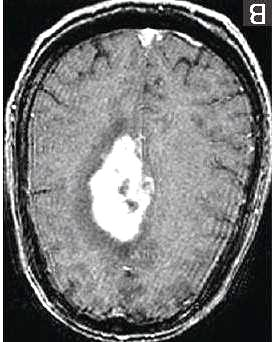

In [ ]:
from google.colab.patches import cv2_imshow

# /content/drive/MyDrive/ColabNotebooks/PRED/
# /content/drive/MyDrive/ColabNotebooks/BTdsYesNo/yes/y223.jpg
img_path = '/content/drive/MyDrive/ColabNotebooks/BTdsYesNo/yes/y223.jpg'

image = cv2.imread(img_path,cv2.IMREAD_UNCHANGED)

img = Image.fromarray(image , 'RGB')

img = img.resize( (224,224) )
img = np.array(img)

img = np.expand_dims(img, axis=0)
img = preprocess_input(img)


print(img.shape)
cv2_imshow(image)
# required shape: u,v,w,x --> eg. (1,224,244,3) 

In [ ]:
print(model.predict(img))

1/1 [==============================] - 1s 834ms/step
[[0.5015613  0.49843875]]


In [ ]:
# from matplotlib.pyplot import imread
# from matplotlib.pyplot import imshow

# img_path = '/content/drive/MyDrive/ColabNotebooks/PRED/0B4RTBQ4.jpg'

# img = image.load_img(img_path, target_size=(224, 224))

# x = image.img_to_array(img)
# x = np.expand_dims(x, axis=0)
# x = preprocess_input(x)

# print('Input image shape:', x.shape)

# my_image = imread(img_path)
# imshow(my_image)